In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv('loan_borowwer_data.csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [22]:
data['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

In [23]:
data['credit.policy'].value_counts()

credit.policy
1    7710
0    1868
Name: count, dtype: int64

In [24]:
data['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [25]:
# convert purpose to numerical feature
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['purpose'] = le.fit_transform(data['purpose'])
print(data['purpose'].value_counts())
print(le.classes_)

purpose
2    3957
0    2331
1    1262
4     629
6     619
5     437
3     343
Name: count, dtype: int64
['all_other' 'credit_card' 'debt_consolidation' 'educational'
 'home_improvement' 'major_purchase' 'small_business']


In [26]:
data.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [27]:
features = data[['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths']]

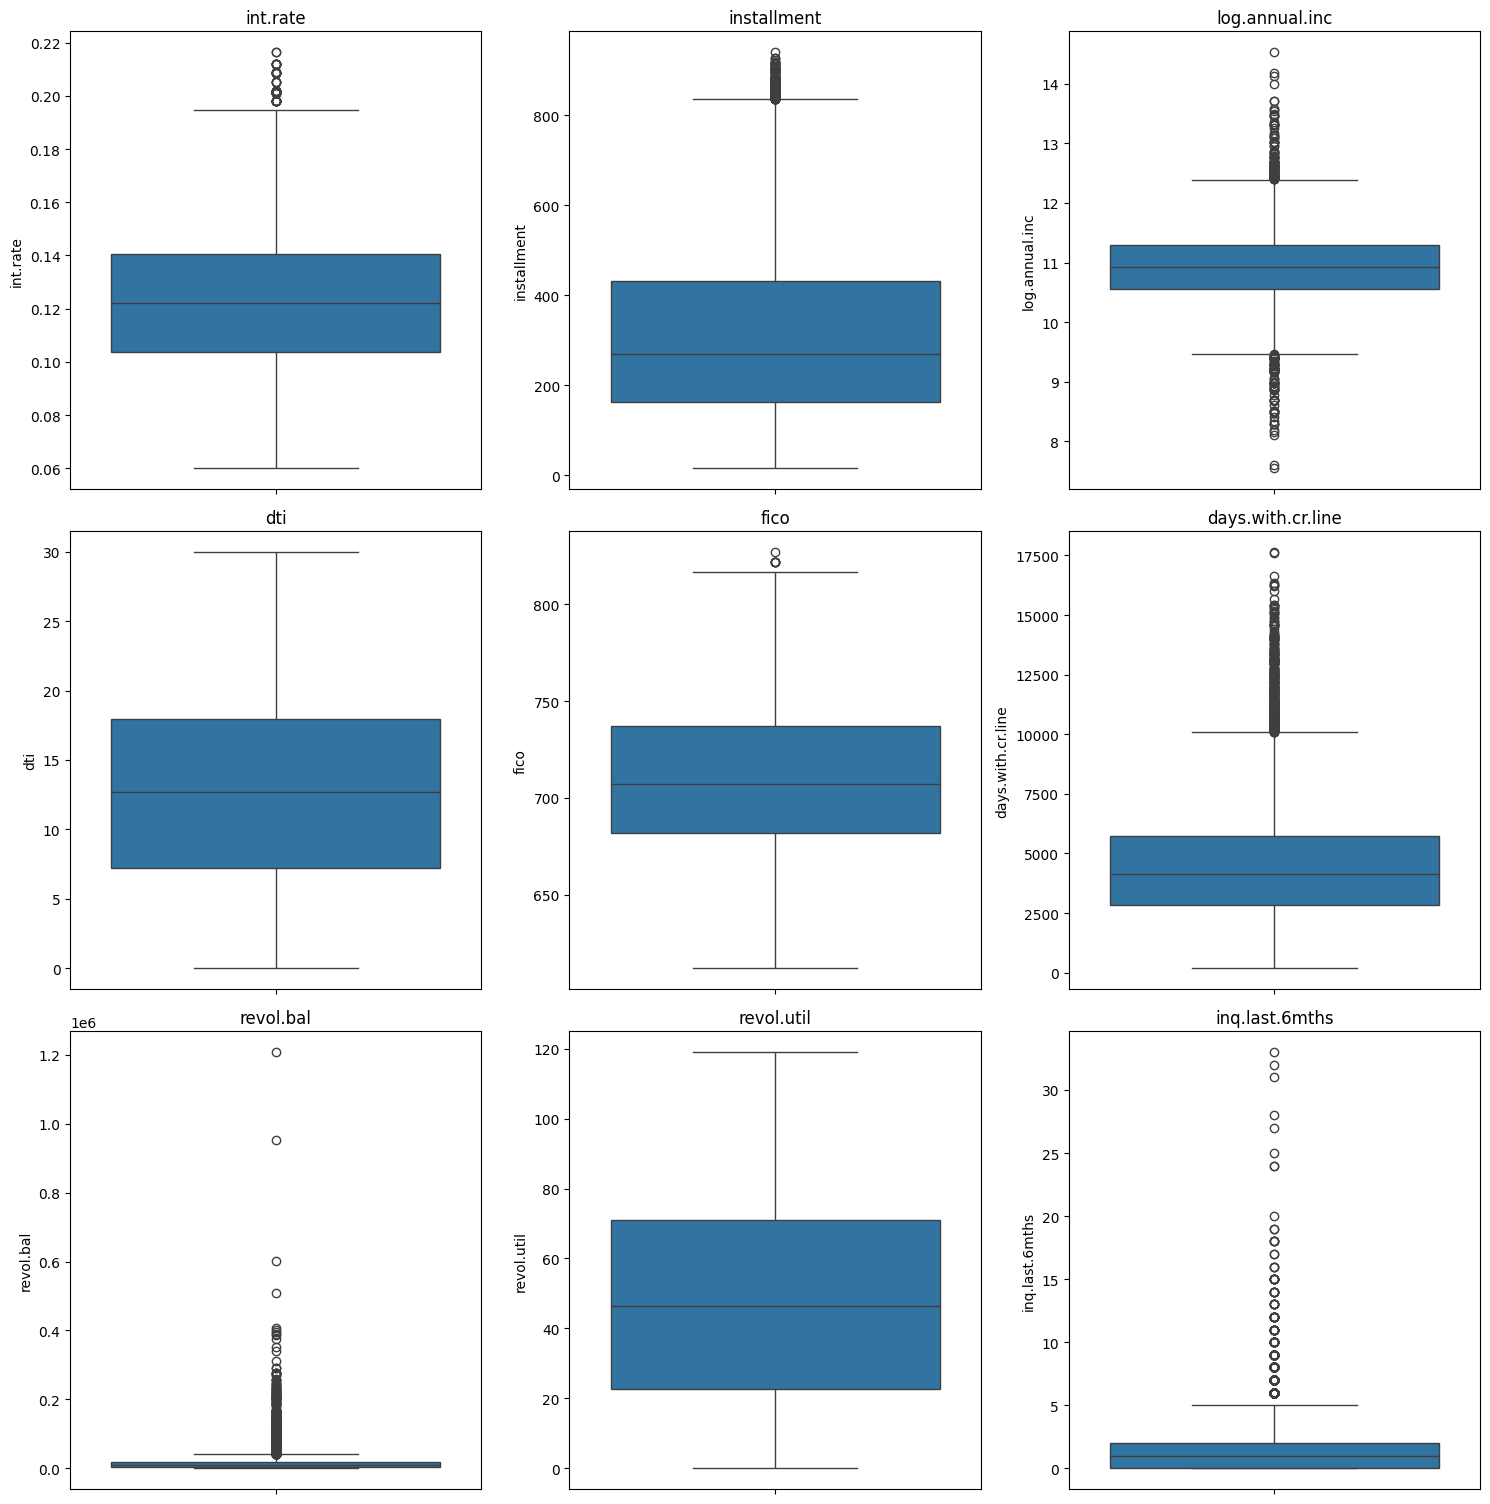

In [28]:
# Calculate number of rows and columns for subplot grid
n_features = len(features)
n_cols = 3  # Number of columns in the grid
n_rows = (n_features + 2) // 3  # Calculate needed rows, rounding up

# Create figure with subplots
plt.figure(figsize=(15, 5*n_rows))

# Create boxplots for each feature
for idx, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, idx+1)
    sns.boxplot(data=data[feature])
    plt.title(feature)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [30]:
X = data.drop('not.fully.paid', axis=1)
y = data['not.fully.paid']

In [31]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
log_model = LogisticRegression(n_jobs=-1)
log_model.fit(X_TRAIN, Y_TRAIN)

LogisticRegression(n_jobs=-1)

In [34]:
y_pred = log_model.predict(X_TEST)


In [35]:
accuracy_score(Y_TEST, y_pred)

0.8423799582463466

In [36]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix, precision_recall_fscore_support

In [37]:

# 1. Classification Report - Comprehensive metrics summary
print("\nClassification Report:")
print(classification_report(Y_TEST, y_pred))

# 2. F1 Score - Balance between precision and recall
f1 = f1_score(Y_TEST, y_pred)
print(f"\nF1 Score: {f1:.3f}")

# 3. Confusion Matrix - True/False Positives/Negatives
cm = confusion_matrix(Y_TEST, y_pred)
print("\nConfusion Matrix:")
print(cm)

# 4. Detailed Metrics - Individual scores with support
precision, recall, fscore, support = precision_recall_fscore_support(Y_TEST, y_pred)
print("\nDetailed Metrics:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-score: {fscore}")
print(f"Support: {support}")


Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.71      0.02      0.03       305

    accuracy                           0.84      1916
   macro avg       0.78      0.51      0.47      1916
weighted avg       0.82      0.84      0.77      1916


F1 Score: 0.032

Confusion Matrix:
[[1609    2]
 [ 300    5]]

Detailed Metrics:
Precision: [0.84284966 0.71428571]
Recall: [0.99875854 0.01639344]
F-score: [0.91420455 0.03205128]
Support: [1611  305]


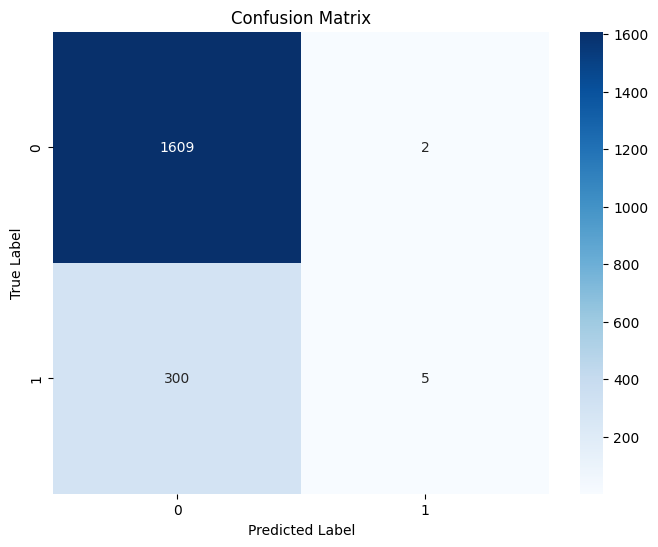

In [38]:
# Visualize Confusion Matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [41]:
# Experiment with different models agorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [42]:
RomdomForest_model = RandomForestClassifier(n_jobs=-1,
                                            random_state=42,
                                            n_estimators=100,
                                            max_depth=10)



RomdomForest_model.fit(X_TRAIN, Y_TRAIN)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [43]:
rf_y_pred = RomdomForest_model.predict(X_TEST)

accuracy_score(Y_TEST, rf_y_pred)

0.8434237995824635

In [44]:

# 1. Classification Report - Comprehensive metrics summary
print("\nClassification Report:")
print(classification_report(Y_TEST, rf_y_pred))

# 2. F1 Score - Balance between precision and recall
rf_f1 = f1_score(Y_TEST, rf_y_pred)
print(f"\nF1 Score: {f1:.3f}")

# 3. Confusion Matrix - True/False Positives/Negatives
rf_cm = confusion_matrix(Y_TEST, rf_y_pred)
print("\nConfusion Matrix:")
print(rf_cm)

# 4. Detailed Metrics - Individual scores with support
rf_precision, rf_recall, rf_fscore, rf_support = precision_recall_fscore_support(Y_TEST, rf_y_pred)
print("\nDetailed Metrics:")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F-score: {rf_fscore}")
print(f"Support: {rf_support}")


Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.86      0.02      0.04       305

    accuracy                           0.84      1916
   macro avg       0.85      0.51      0.48      1916
weighted avg       0.85      0.84      0.78      1916


F1 Score: 0.032

Confusion Matrix:
[[1610    1]
 [ 299    6]]

Detailed Metrics:
Precision: [0.84337349 0.85714286]
Recall: [0.99937927 0.01967213]
F-score: [0.91477273 0.03846154]
Support: [1611  305]


In [45]:
XGB_model = XGBClassifier(n_jobs=-1,
                          objective='binary:logistic',
                          eval_metric='logloss')

XGB_model.fit(X_TRAIN, Y_TRAIN)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, random_state=None, ...)

In [46]:
xb_accuracy = XGB_model.score(X_TEST, Y_TEST)
print(f"XGBoost Model Accuracy: {xb_accuracy:.3f}")

XGBoost Model Accuracy: 0.830


In [47]:
xg_y_pred = XGB_model.predict(X_TEST)

In [48]:

# 1. Classification Report - Comprehensive metrics summary
print("\nClassification Report:")
print(classification_report(Y_TEST, xg_y_pred))

# 2. F1 Score - Balance between precision and recall
xg_f1 = f1_score(Y_TEST, xg_y_pred)
print(f"\nF1 Score: {f1:.3f}")

# 3. Confusion Matrix - True/False Positives/Negatives
xg_cm = confusion_matrix(Y_TEST, xg_y_pred)
print("\nConfusion Matrix:")
print(xg_cm)

# 4. Detailed Metrics - Individual scores with support
xg_precision, xg_recall, xg_fscore, xg_support = precision_recall_fscore_support(Y_TEST, xg_y_pred)
print("\nDetailed Metrics:")
print(f"Precision: {xg_precision}")
print(f"Recall: {xg_recall}")
print(f"F-score: {xg_fscore}")
print(f"Support: {xg_support}")


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1611
           1       0.36      0.08      0.13       305

    accuracy                           0.83      1916
   macro avg       0.60      0.53      0.52      1916
weighted avg       0.77      0.83      0.78      1916


F1 Score: 0.032

Confusion Matrix:
[[1566   45]
 [ 280   25]]

Detailed Metrics:
Precision: [0.84832069 0.35714286]
Recall: [0.97206704 0.08196721]
F-score: [0.90598785 0.13333333]
Support: [1611  305]
